In [2]:
import requests
import json
from urllib.request import urlopen
from glob import glob
from time import sleep
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from operator import itemgetter

In [1]:
#Api keys
Key_ArticleSearch = 'api-key=483c605d84a447b8ba8756c5c804bdb9'
Key_MostPopular = 'api-key=483c605d84a447b8ba8756c5c804bdb9'

# Analysis \# 1: Count of articles containing "alt-right" over time 

In [4]:
#Pull Article Search results for 25 years for query "alt-right" and store each result in a json file

starturl = "http://api.nytimes.com/svc/search/v2/articlesearch.json?"
query = "query=alt-right&"
startdate = "begin_date=20160101&"
enddate = "end_date=20170101&"

startyear = 2017
years = 25

for y in range(years):
    
    #create file with right name to reflect year of data
    with open("data/nyt/alt-right/"+ str(startyear - y - 1) + ".json","w+") as f:
              
        #start date = current year, going backwards
        startdate = "begin_date=" + str(startyear - y - 1) +"0101&"
            
        enddate = "end_date=" +  str(startyear - y) + "0101&"
        
        url = starturl + query + startdate + enddate + Key_ArticleSearch
        
        r = requests.get(url)
        
        f.write(str(r.json()))
        
        sleep(1) #this is to prevent the API time limit

In [5]:
#create list of the files that were created
files = glob('./data/nyt/alt-right/*')

In [6]:
# extract the number of results from the result string and store it in a list
altright = []
for file in files:
    temp = []
    with open(file,"r") as f:
        temp.append([file , f.readlines()])
        
        hitslocationstart = temp[0][1][0].find('\'hits\':') +  1
        numlocationstart = temp[0][1][0].find('\'',hitslocationstart)
        numlocationend = temp[0][1][0].find('\'',numlocationstart + 1)
        
        hits = ''.join(c for c in temp[0][1][0][numlocationstart : numlocationend] if c.isdigit())
        
        altright.append([int(file[21:25]), int(hits)])   

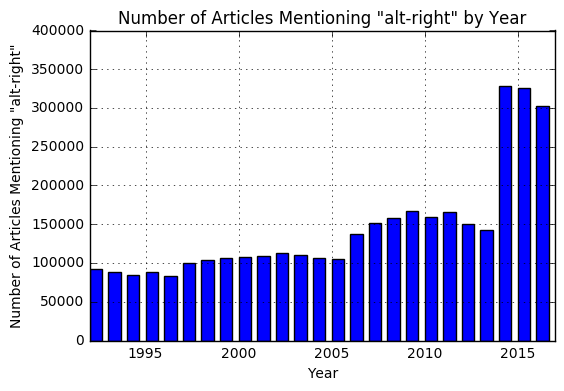

In [7]:
#plot a bar chart of the number of results per year
x = [i[0] for i in altright]
y = [i[1] for i in altright]

width = 1/1.5
plt.bar(x, y, width, color="blue")

plt.xlabel('Year')
plt.ylabel('Number of Articles Mentioning "alt-right"')
plt.title('Number of Articles Mentioning "alt-right" by Year')
plt.axis([1992, 2017, 0, 400000])
plt.grid(True)

plt.show()

# Analysis \# 2: Top Words in Recent Article Titles

In [8]:
#pull the most popular articles from the last 30 days
starturl = "https://api.nytimes.com/svc/mostpopular/v2/mostshared/"
section = "all-sections/"
time_period = "30"
fileend = ".json"
    
#create file with right name to reflect year of data
with open("data/nyt/titles.json","w+") as f:      
        url = starturl + section + time_period + fileend + '?' + Key_MostPopular
        r = requests.get(url)
        f.write(str(r.json()))

In [9]:
#read in the titles from the json to a list
titlesfile = []
with open("data/nyt/titles.json","r") as f:
    titlesfile.extend(f.readlines())

In [10]:
#extract the titles from the list containing the file

currentI = 0
nextI = titlesfile[0].find('\'title\':', currentI + 1)
titles =[]

numtitles = titlesfile[0].count('\'title\':')

for i in range(numtitles):
    currentI = nextI
    nextI = titlesfile[0].find('\'title\':', currentI + 1)
    titles.append(titlesfile[0][currentI + 10 : titlesfile[0].find('\',', currentI + 1)])

In [11]:
# convert the list of titles to a list of the words from those titles and make those words lowercase
for t in range(len(titles)):
    titles[t] = titles[t].split()

In [13]:
# convert the list of titles to a list of the words from those titles and make those words lowercase
titlewords = [w.lower() for t in titles for w in t]

In [14]:
#make a new list removing duplicates
settitlewords = list(set(titlewords))

In [15]:
# remove stopwords using NLTK
for w in settitlewords:
    if w in stopwords.words():
        settitlewords.remove(w)
    if w is "and":
        settitlewords.remove(w)

In [16]:
titlewordcount = [ [w,titlewords.count(w)] for w in settitlewords]

In [17]:
titlewordcount = sorted(titlewordcount,key=itemgetter(1), reverse = True)

In [18]:
print("The most frequent words from the most popular posts in the last 30 days are: ")

for w in range(6):
    print(titlewordcount[w][0] + " COUNT = " + str(titlewordcount[w][1]))

The most frequent words from the most popular posts in the last 30 days are: 
trump COUNT = 7
in COUNT = 4
devos COUNT = 3
as COUNT = 3
betsy COUNT = 2
russian COUNT = 2



# Analysis \# 3: Trump vs Obama Popularity Contest

In [19]:
#pull in trump articles
starturl = "http://api.nytimes.com/svc/search/v2/articlesearch.json?"
query = "query=Donald+Trump&"
startdate = "begin_date=20160101&"
enddate = "end_date=20170101&"

startyear = 2017
years = 20

for y in range(years):
    
    #create file with right name to reflect year of data
    with open("data/nyt/trump/"+ str(startyear - y - 1) + ".json","w+") as f:
              
        #start date = current year, going backwards
        startdate = "begin_date=" + str(startyear - y - 1) +"0101&"
            
        enddate = "end_date=" +  str(startyear - y) + "0101&"
        
        url = starturl + query + startdate + enddate + Key_ArticleSearch
        
        r = requests.get(url)
        
        f.write(str(r.json()))
        
        sleep(1)

In [ ]:
#pull in obama articles
starturl = "http://api.nytimes.com/svc/search/v2/articlesearch.json?"
query = "query=Obama&"
startdate = "begin_date=20160101&"
enddate = "end_date=20170101&"

startyear = 2017
years = 20

for y in range(years):
    
    #create file with right name to reflect year of data
    with open("data/nyt/obama/"+ str(startyear - y - 1) + ".json","w+") as f:
              
        #start date = current year, going backwards
        startdate = "begin_date=" + str(startyear - y - 1) +"0101&"
            
        enddate = "end_date=" +  str(startyear - y) + "0101&"
        
        url = starturl + query + startdate + enddate + Key_ArticleSearch
        
        r = requests.get(url)
        
        f.write(str(r.json()))
        
        sleep(1)

In [ ]:
#compile list of Trump results
files = glob('./data/nyt/trump/*')
trump = []
for file in files:
    temp = []
    with open(file,"r") as f:
        temp.append([file , f.readlines()])
        
        hitslocationstart = temp[0][1][0].find('\'hits\':') +  1
        numlocationstart = temp[0][1][0].find('\'',hitslocationstart)
        numlocationend = temp[0][1][0].find('\'',numlocationstart + 1)
        
        hits = ''.join(c for c in temp[0][1][0][numlocationstart : numlocationend] if c.isdigit())
        
        trump.append([int(file[17:21]), int(hits)])   

In [ ]:
#compile list of Obama Results
files = glob('./data/nyt/obama/*')
obama = []
for file in files:
    temp = []
    with open(file,"r") as f:
        temp.append([file , f.readlines()])
        
        hitslocationstart = temp[0][1][0].find('\'hits\':') +  1
        numlocationstart = temp[0][1][0].find('\'',hitslocationstart)
        numlocationend = temp[0][1][0].find('\'',numlocationstart + 1)
        
        hits = ''.join(c for c in temp[0][1][0][numlocationstart : numlocationend] if c.isdigit())
        
        obama.append([int(file[17:21]), int(hits)])   

In [ ]:
obama

In [ ]:
#plot a bar chart of the number of results per year
x = [i[0] for i in trump]
yt = [i[1] for i in trump]
yo = [i[1] for i in obama]


ax = plt.subplot(111)
ax.bar(x, yt,width=0.2,color='red',align='center') #Trump is red because Republicans are red
ax.bar(x, yo,width=0.2,color='blue',align='center')


plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Mentioning "alt-right" by Year')
plt.axis([1992, 2017, 0, 400000])
plt.grid(True)

plt.show()